## Perceptron

---

### 1. Theoretical Intuition
- A **Perceptron** is the **simplest type of artificial neural network** (ANN).  
- It is a **binary classifier** that maps input features to an output using a **linear combination of weights** and an **activation function**.  
- Introduced by **Frank Rosenblatt (1958)**.  
- Think of it as a **single neuron in the brain**.

---

### 2. Key Pointers
- It works for **linearly separable data**.  
- Inputs (**x1, x2, ... xn**) are multiplied by weights (**w1, w2, ... wn**) and summed up with a **bias** term.  
- Output is passed through a **step activation function** (0 or 1).  
- **Learning**: weights are updated based on **prediction error** using the **Perceptron learning rule**.  
- Limitation: Cannot solve **non-linear problems** like XOR.  

---

### 3. Use Cases
- Early **binary classification tasks**  
- Simple **pattern recognition**  
- Foundation for **more complex neural networks**  

---

### 4. Mathematical Intuition
- Weighted sum:  

\[
z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b
\]

- Activation function (step):  

\[
y =
\begin{cases} 
1 & \text{if } z \ge 0 \\
0 & \text{if } z < 0
\end{cases}
\]

- Weight update (Perceptron learning rule):  

\[
w_i = w_i + \Delta w_i
\]  

\[
\Delta w_i = \eta (y_{\text{true}} - y_{\text{pred}}) x_i
\]  

where **η** = learning rate, **y_true** = actual label, **y_pred** = predicted label.

---

### 5. Interview Q&A

| Question | Answer |
|----------|--------|
| What is a Perceptron? | The simplest type of neural network; a binary classifier that uses weighted sum and activation. |
| Who introduced the Perceptron? | Frank Rosenblatt in 1958. |
| How does a Perceptron make predictions? | Computes weighted sum of inputs + bias, passes through step function. |
| What is the main limitation of a Perceptron? | Cannot solve non-linear problems like XOR. |
| What is the Perceptron learning rule? | Updates weights based on prediction error: w_i = w_i + η*(y_true - y_pred)*x_i |
| What type of data can a Perceptron classify? | Linearly separable data. |
| Why do we need bias in a Perceptron? | Allows shifting the decision boundary away from the origin. |
| Can a single Perceptron be used for multi-class classification? | No, only binary; multi-class requires multiple Perceptrons or other architectures. |

---

### 6. Code Demo: Simple Perceptron in Python

```python
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

# Perceptron class
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs
        
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return step(z)
    
    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                self.weights += update * xi
                self.bias += update

# Training data: AND gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Train Perceptron
p = Perceptron(input_size=2)
p.fit(X, y)

# Predictions
for xi in X:
    print(f"Input: {xi}, Predicted: {p.predict(xi)}")


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
## Create dummy dataset with random features cgpa and score and target result (0 / 1)
np.random.seed(42)
n_samples = 10000
df = pd.DataFrame({
    'cgpa': np.round(np.random.uniform(2.5, 4.0, n_samples), 1),
    'score': np.random.randint(60, 100, n_samples),
    'result': np.random.randint(0, 2, n_samples)
})


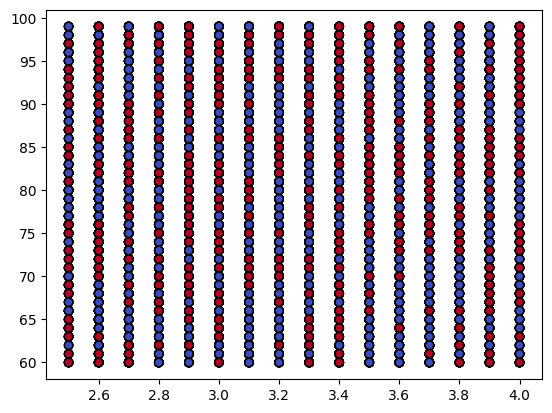

In [20]:
plt.scatter(df['cgpa'], df['score'], c=df['result'], cmap='coolwarm', edgecolors='k')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['cgpa', 'score']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(X_train, y_train)



,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [24]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score

(0.507625, 0.5125)

In [27]:
model.loss

'perceptron'